In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [26]:
confirmed_global = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col=None, header=0)
confirmed_global = confirmed_global.drop(columns=['Lat', 'Long','Province/State'])
confirmed_global = confirmed_global.groupby('Country/Region').sum().reset_index()
confirmed_global


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/26/22,9/27/22,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22,10/3/22,10/4/22,10/5/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,198543,198750,198876,199067,199188,199310,199386,199545,199690,199845
1,Albania,0,0,0,0,0,0,0,0,0,...,331987,332066,332129,332173,332221,332263,332285,332290,332337,332372
2,Algeria,0,0,0,0,0,0,0,0,0,...,270649,270654,270662,270668,270673,270676,270679,270682,270690,270693
3,Andorra,0,0,0,0,0,0,0,0,0,...,46147,46147,46227,46227,46227,46227,46227,46227,46227,46227
4,Angola,0,0,0,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,702768,702768,702768,702768,702768,702768,702768,702768,702768,702804
197,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
198,Yemen,0,0,0,0,0,0,0,0,0,...,11935,11935,11935,11935,11935,11935,11935,11935,11935,11939
199,Zambia,0,0,0,0,0,0,0,0,0,...,333439,333503,333503,333531,333531,333549,333549,333555,333555,333555


In [27]:
total_global_cases = confirmed_global.sum(axis=0).to_frame()
total_global_cases = total_global_cases.iloc[2:-1].rename(columns={0: 'Total Confirmed Cases'})
total_global_cases

,Total Confirmed Cases
1/23/20,657
1/24/20,944
1/25/20,1437
1/26/20,2120
1/27/20,2929
...,...
9/30/22,617825317
10/1/22,618064582
10/2/22,618264485
10/3/22,618582606


In [28]:
total_global_cases.index = pd.to_datetime(total_global_cases.index)
total_global_cases

,Total Confirmed Cases
2020-01-23,657
2020-01-24,944
2020-01-25,1437
2020-01-26,2120
2020-01-27,2929
...,...
2022-09-30,617825317
2022-10-01,618064582
2022-10-02,618264485
2022-10-03,618582606


In [29]:
resetidx_total_global_cases = total_global_cases.reset_index()
resetidx_total_global_cases

,index,Total Confirmed Cases
0,2020-01-23,657
1,2020-01-24,944
2,2020-01-25,1437
3,2020-01-26,2120
4,2020-01-27,2929
...,...,...
981,2022-09-30,617825317
982,2022-10-01,618064582
983,2022-10-02,618264485
984,2022-10-03,618582606


In [30]:
newdf = resetidx_total_global_cases.groupby([resetidx_total_global_cases['index'].dt.year.rename('year'),resetidx_total_global_cases['index'].dt.month.rename('month')])['Total Confirmed Cases'].sum()
newdf

year  month
2020  1              38000
      2            1672160
      3            8977391
      4           63570999
      5          145170770
      6          246829800
      7          431914997
      8          672242513
      9          895668914
      10        1229777522
      11        1649074584
      12        2297842570
2021  1         2924275161
      2         3062548626
      3         3768798855
      4         4208374477
      5         5050780031
      6         5320225651
      7         5896286874
      8         6466839309
      9         6812036062
      10        7473206835
      11        7655584916
      12        8495579816
2022  1        10276444988
      2        11573254797
      3        14385200806
      4        15102088750
      5        16194913059
      6        16149269638
      7        17439145446
      8        18349623512
      9        18326379432
      10        2474137495
Name: Total Confirmed Cases, dtype: object

In [31]:
newsdf = newdf.to_frame()
newsdf = newsdf.reset_index()
newsdf

,year,month,Total Confirmed Cases
0,2020,1,38000
1,2020,2,1672160
2,2020,3,8977391
3,2020,4,63570999
4,2020,5,145170770
5,2020,6,246829800
6,2020,7,431914997
7,2020,8,672242513
8,2020,9,895668914
9,2020,10,1229777522


In [32]:
newsdf['date'] = pd.to_datetime(newsdf[['year', 'month']].assign(DAY=1))
newsdf = newsdf[newsdf['date']<'2022-10-01']
newsdf = newsdf.drop(columns=['year', 'month'])
newsdf

,Total Confirmed Cases,date
0,38000,2020-01-01
1,1672160,2020-02-01
2,8977391,2020-03-01
3,63570999,2020-04-01
4,145170770,2020-05-01
5,246829800,2020-06-01
6,431914997,2020-07-01
7,672242513,2020-08-01
8,895668914,2020-09-01
9,1229777522,2020-10-01


c:\Users\Eric\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\Users\Eric\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\Users\Eric\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\Eric\AppData\Local\Programs\Python\Python37\lib\site-packag

(array([737425., 737546., 737669., 737791., 737911., 738034., 738156.,
        738276., 738399.]),
 <a list of 9 Text xticklabel objects>)

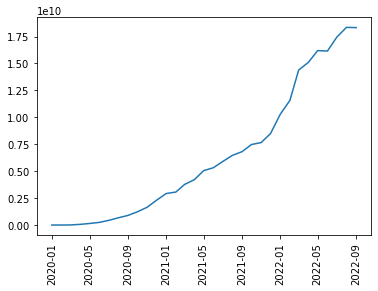

In [33]:
plt.plot(newsdf['date'],newsdf['Total Confirmed Cases'])
plt.xticks(rotation='vertical')